# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.022477e+01     6.445174e+00
 * time: 0.00428318977355957
     1     2.630664e+01     4.234537e+00
 * time: 0.012264013290405273
     2     1.887158e+01     5.334937e+00
 * time: 0.03197216987609863
     3     1.783503e+01     4.973069e+00
 * time: 0.05141711235046387
     4     1.281176e+01     1.818635e+00
 * time: 0.07051897048950195
     5     1.104853e+01     9.492717e-01
 * time: 0.08937501907348633
     6     1.045369e+01     1.218296e+00
 * time: 0.10520720481872559
     7     9.989342e+00     7.761610e-01
 * time: 0.12081503868103027
     8     9.813126e+00     8.192802e-01
 * time: 0.1360330581665039
     9     9.690271e+00     5.621574e-01
 * time: 0.15147709846496582
    10     9.597245e+00     4.217310e-01
 * time: 0.16707420349121094
    11     9.488333e+00     4.600122e-01
 * time: 0.18259906768798828
    12     9.408321e+00     7.838665e-01
 * time: 0.19444799423217773
    13     9.336740e+00     5.613079e-01
 * time:

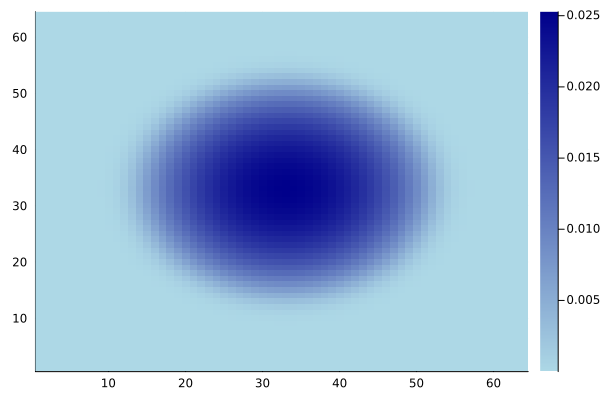

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)